In [15]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [77]:
def calc_julia(resolution, c, bound=1.1, z_max=4.0, n_max=1000):

    step = 2.0 * bound / resolution
    counts = np.zeros((resolution+1, resolution+1, resolution+1, resolution+1), dtype=np.int32)

    for x in range(resolution + 1):
        for y in range(resolution + 1):
            for z in range(resolution + 1):
                for n in range(resolution + 1):
                    r = -bound + x * step
                    i = -bound + y * step
                    j = -bound + z * step
                    k = -bound + n * step

                    counter = 0
                    while (r*r - i*i - j*j - k*k) < (z_max * z_max) and counter < n_max:
                        oldR = r
                        r = r*r - i*i - j*j - k*k + c.real #real component of z^2
                        i = 2 * oldR * i #imaginary component of z^2
                        j = 2 * oldR * j #imaginary component of z^2
                        k = 2 * oldR * k #imaginary component of z^2
                        counter += 1

                    counts[x, y, z, n] = counter

    return np.asarray(counts)

In [89]:
def calc_julia(resolution, c, bound=1.1, z_max=4.0, n_max=1000):

    step = 2.0 * bound / resolution
    counts = np.zeros((resolution+1, resolution+1), dtype=np.int32)

    for x in range(resolution + 1):
        for y in range(resolution + 1):
            r = -bound + x * step
            im = -bound + y * step
#             z = r + im * 1j
            counter = 0
            while (r*r + im*im) < (z_max * z_max) and counter < n_max:
#                 z = z ** 2 #+ c
                oldR = r
                r = r*r - im*im + c.real #real component of z^2
                im = 2 * oldR * im# + c.imag #imaginary component of z^2
                counter += 1
            counts[x, y] = counter

    return np.asarray(counts)

In [90]:
t1 = time.time()
jl = calc_julia(50, (0.279155 + 0.01j))
print ("time:", time.time() - t1)

time: 0.020380735397338867


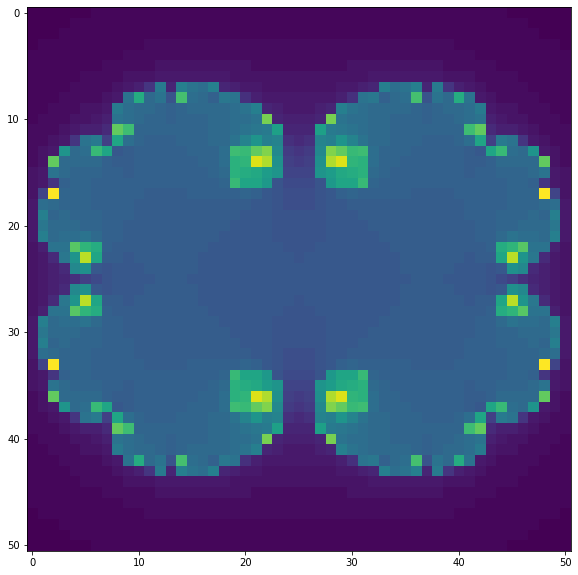

In [91]:
plt.subplots()[0].set_size_inches(10, 10)
plt.imshow(jl)
plt.show()

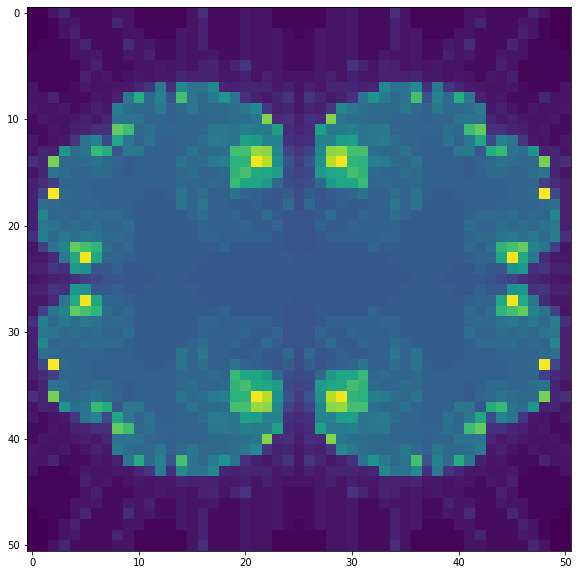

In [88]:
plt.subplots()[0].set_size_inches(10, 10)
plt.imshow(jl[:, :, 25, 25])
plt.show()

In [3]:
23000000 * 0.0000005, 4000000 * 0.0000005

(11.5, 2.0)

In [9]:
def norm2(z):
    return z.real * z.real + z.imag * z.imag

def calc_julia(resolution, c, bound=1.1, z_max=4.0, n_max=1000):

    step = 2.0 * bound / resolution
    counts = np.zeros((resolution+1, resolution+1), dtype=np.int32)

    for i in range(resolution + 1):
        real = -bound + i * step
        for j in range(resolution + 1):
            imag = -bound + j * step
            z = real + imag * 1j
            k = 0
            while norm2(z) < (z_max * z_max) and k < n_max:
                z = z ** 2
                k += 1
                
            counts[i,j] = k

    return np.asarray(counts)

time: 3.9027791023254395


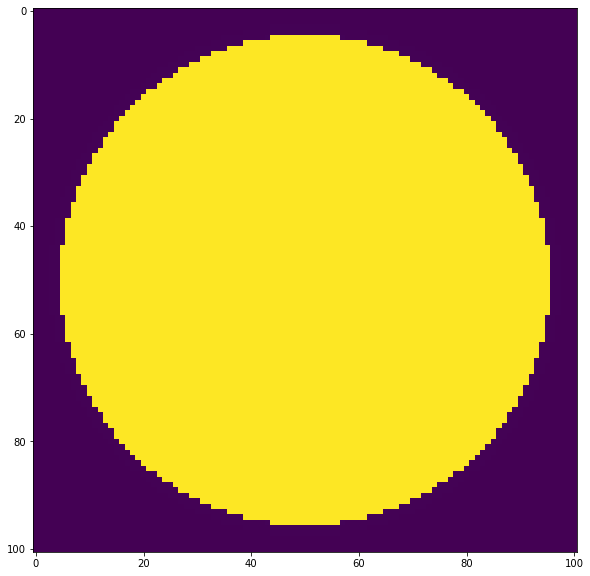

In [10]:
t1 = time.time()
jl = calc_julia(100, (0.279155 + 0.01j))
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(10, 10)
plt.imshow(jl)
plt.show()

In [4]:
np.shape(jl)

(101, 101)

In [15]:
def calc_julia2(resolution, c, bound=2.8, z_max=4.0, n_max=1000):

    step = 2.0 * bound / resolution
    counts = np.zeros((resolution+1, resolution+1), dtype=np.int32)

    for i in range(resolution + 1):
        real = -bound + i * step
        for j in range(resolution + 1):
            imag = -bound + j * step
            z = real + imag * 1j
            k = 0

            while (z.real * z.real + z.imag * z.imag) < (z_max * z_max) and k < n_max:
                z = z * z + c
                k += 1
            counts[i,j] = k

    return np.asarray(counts)

time: 0.1960005760192871


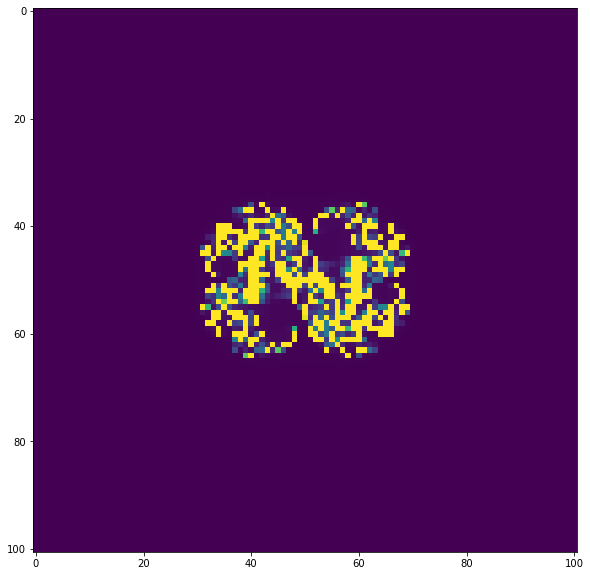

In [16]:
t1 = time.time()
jl = calc_julia2(100, (0.279155 + 0.01j))
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(10, 10)
plt.imshow(jl)
plt.show()

time: 0.03807854652404785


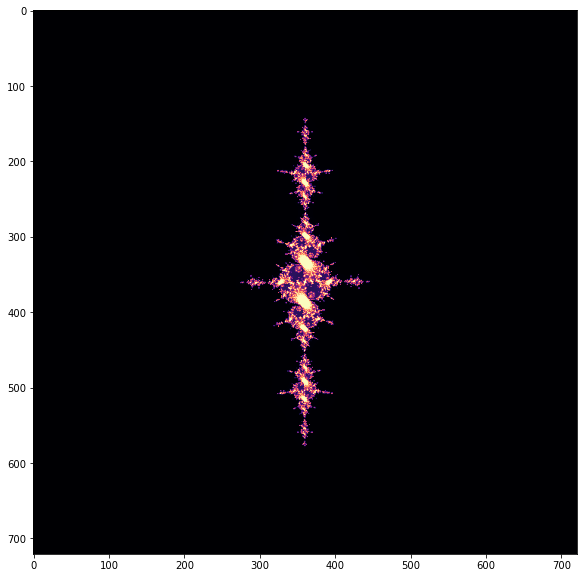

In [7]:
import julia

t1 = time.time()
jl = julia.calc_julia(720, (-1.25 + 0.01j))
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(10, 10)
plt.imshow((jl), cmap='magma')
plt.show()

1061


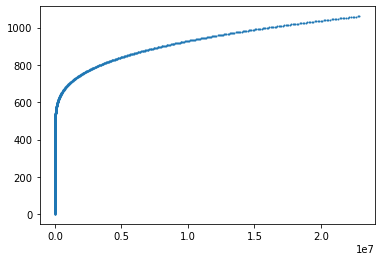

In [3]:
counter = 0
ii = 0
x = []
y = []

for i in range(1, 23000000): #4000000
    if np.log10(i) - counter < 2.5:
        counter = 0
        ii += 1
        x.append(i)
        y.append(ii)
    else:
        counter += 1/((i - ii)**(0.6))
        
print(ii)
plt.scatter(x, y, s=1)

In [9]:
import julia2

def plot1(i, real):
    jl = julia.calc_julia(1440, (real + 0.01j))

    fig, ax = plt.subplots()
    fig.set_size_inches(20, 20)
    fig.patch.set_visible(False)
    ax.axis('off')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        
    ax.imshow((jl), cmap='magma')

    plt.savefig('C:\\Users\\ksn\\temp/{:04d}.png'.format(i))
    plt.clf()


In [10]:
# real = 0.279155

# for i in range(1000):
#     plot1(i, real)
#     real += 0.000001

c:\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


SystemError: <built-in method write of _io.BufferedWriter object at 0x000001C97D4A8308> returned a result with an error set

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

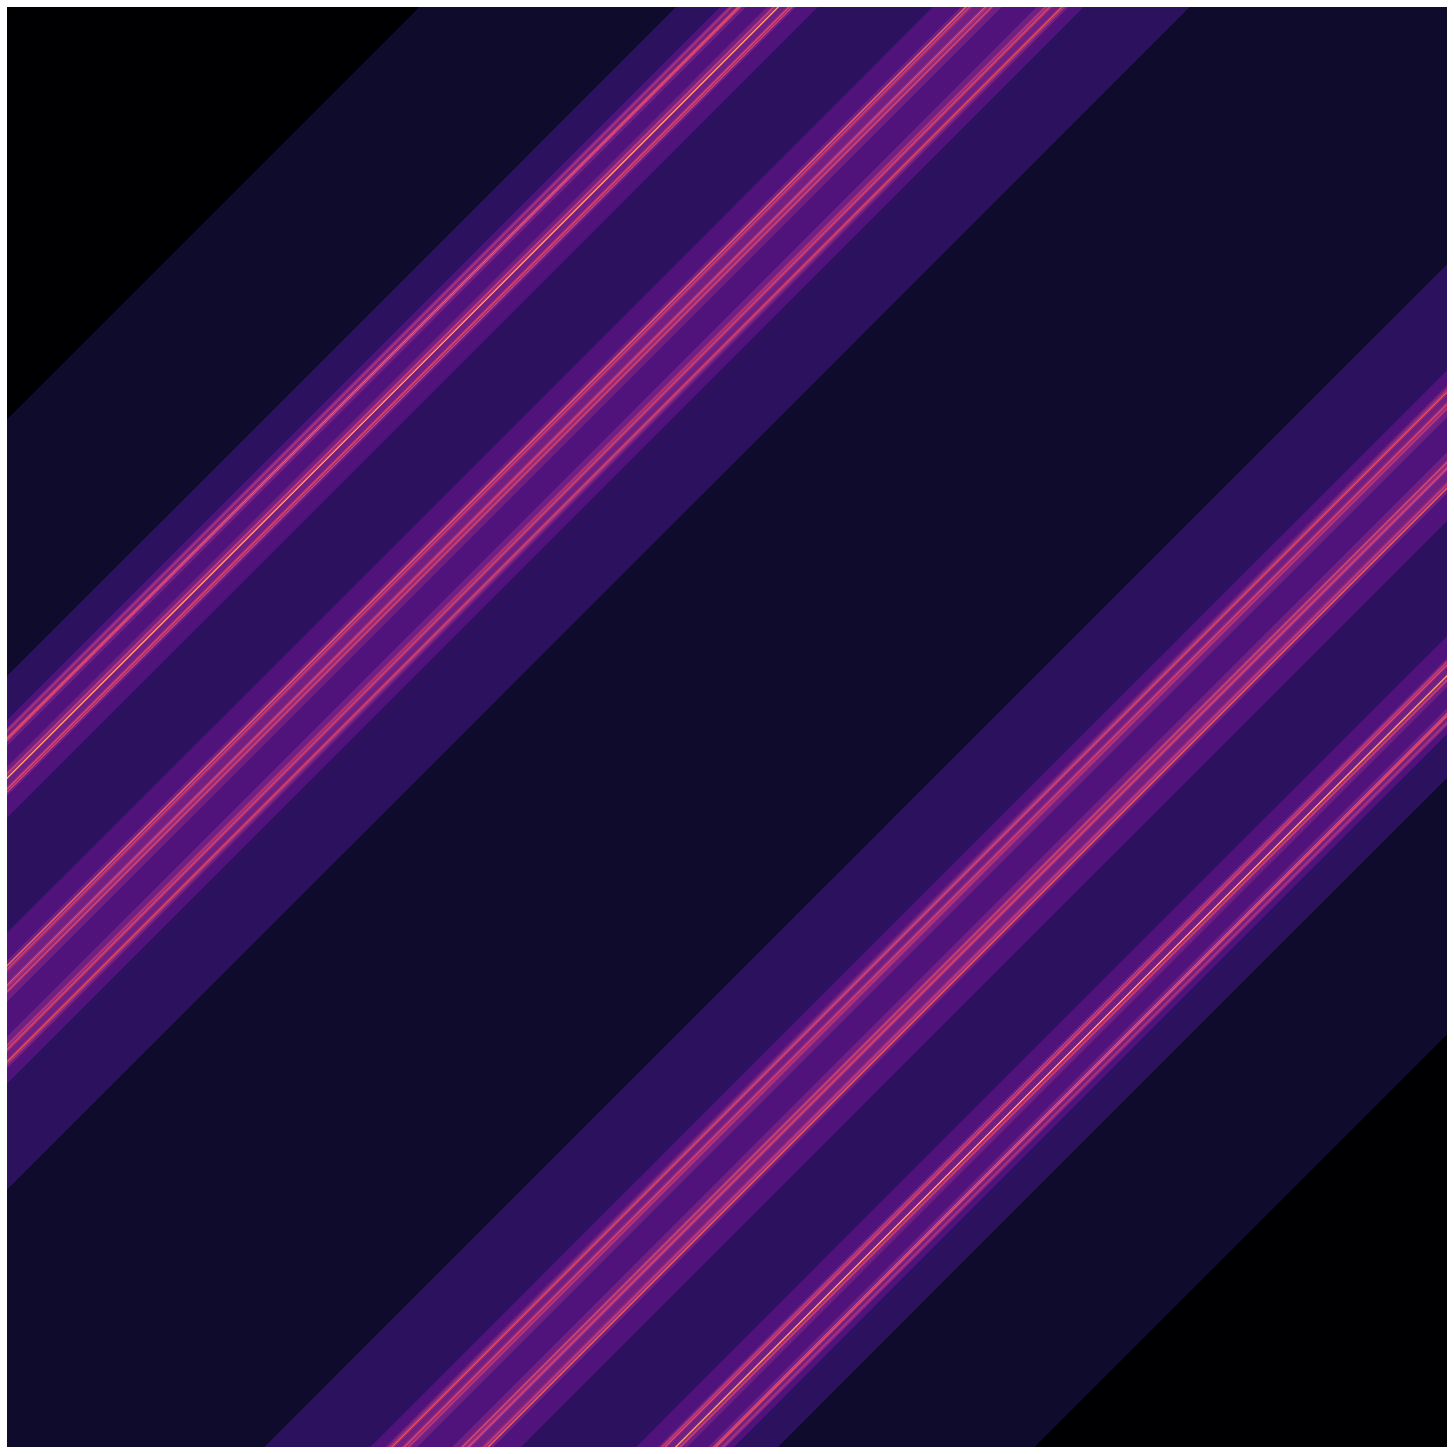

In [11]:
counter = 0
ii = 0
real = 0.279155

for i in range(1, 23000000):
    real += 0.0000005
    if np.log10(i) - counter < 2.5:
        counter = 0
        plot1(ii, real)
        ii += 1
    else:
        counter += 1/((i - ii)**(0.6))